In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from utils2 import *

### AUTORELOAD
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('Data\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ritaf\AppData\Local\Temp\ipykernel_10416\486151765.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv('Data\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out.csv')


In [31]:
# spent_amounts = ['Beer', 'Bottled_Water', 'Bread', 'Meat', 'Dairy', 'Fresh_Foods', 'Frozen_Foods', 'Fruit_Beverages', 'Pastry', 'Sodas', 'Toiletries', 'Veggies', 'Wines']
# data['Spent_Sum'] = data[spent_amounts].sum(axis=1)

In [4]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
demographic_metrics = ['id_client', 'frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

In [6]:
preference = data[preference_metrics]
demographic = data[demographic_metrics]

# Preference Clustering

Scale the data

In [8]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [14]:
pref_no_scl = preference.copy()
pref_st_scl = standard.fit_transform(preference)
pref_mm_scl = minmax.fit_transform(preference)
pref_rb_scl = robust.fit_transform(preference)

In [15]:
preference_no_scl = preference.copy()
preference_no_scl[preference_metrics] = pref_no_scl

preference_st_scl = preference.copy()
preference_st_scl[preference_metrics] = pref_st_scl

preference_mm_scl = preference.copy()
preference_mm_scl[preference_metrics] = pref_mm_scl

preference_rb_scl = preference.copy()
preference_rb_scl[preference_metrics] = pref_rb_scl

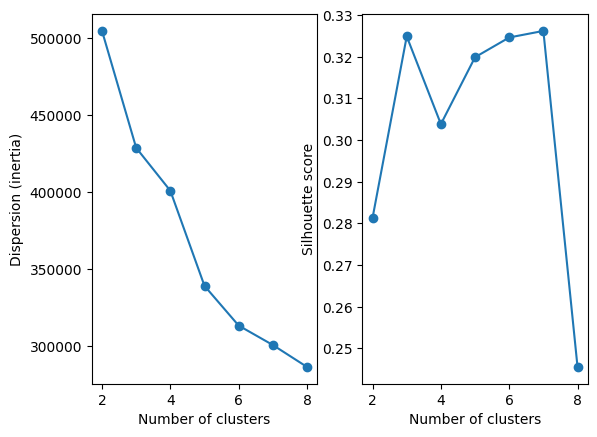

In [54]:
plot_inertia_and_silhouette(preference_st_scl.sample(frac=0.4, random_state=1), 2, 8)

In [92]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference['st_kmeans7'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_10416\3363836504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference['st_kmeans7'] = kmeans.predict(preference_st_scl)


In [90]:
groupby_mean(preference, 'st_kmeans3')

st_kmeans3,0,1,2,data
beer,85.69,46.24,45.54,58.81
bottled_water,84.02,44.86,44.74,57.52
bread,30.94,31.71,22.18,28.44
meat,2.54,3.48,1.93,2.68
dairy,31.52,31.77,78.57,46.53
fresh_foods,34.32,110.16,33.06,61.12
frozen_foods,113.60,66.15,33.56,71.20
fruit_beverages,21.56,96.88,20.86,48.35
pastry,31.71,63.42,55.83,50.73
sodas,35.90,35.48,35.07,35.49


In [91]:
groupby_mean(preference, 'st_kmeans6')

st_kmeans6,0,1,2,3,4,5,data
beer,45.27,46.14,135.96,85.29,45.64,46.08,58.81
bottled_water,44.66,44.87,57.08,84.09,44.89,45.31,57.52
bread,16.64,30.62,197.70,30.34,30.08,28.53,28.44
meat,1.05,1.99,313.31,1.33,1.26,1.98,2.68
dairy,82.53,31.17,318.85,30.49,31.28,83.85,46.53
fresh_foods,32.18,109.76,209.49,33.66,91.24,34.88,61.12
frozen_foods,33.46,85.39,282.39,112.41,32.78,34.24,71.20
fruit_beverages,20.35,97.45,149.32,21.08,77.83,21.77,48.35
pastry,38.13,31.30,53.02,31.34,116.15,62.23,50.73
sodas,33.38,34.23,401.48,33.87,33.98,35.64,35.49


In [53]:
preference['rb_kmeans7'].value_counts()

rb_kmeans7
0    119542
4      2020
5       617
2       266
1       141
3       100
6        12
Name: count, dtype: int64

In [61]:
preference['st_kmeans3'].value_counts()

st_kmeans3
1    44005
0    39784
2    38909
Name: count, dtype: int64

In [62]:
preference['st_kmeans6'].value_counts()

st_kmeans6
3    39398
1    27095
4    21542
0    21291
5    12899
2      473
Name: count, dtype: int64

-----

In [95]:
from sklearn.neighbors import NearestNeighbors

def plot_kdist_graph(df, feats, n_neighbors=150):
  # K-distance graph to find out the right eps value
  ## For each data point, we calculate the average distance
  ## to its n_neighbors

  neigh = NearestNeighbors(n_neighbors=n_neighbors)
  neigh.fit(df[feats])
  distances, _ = neigh.kneighbors(df[feats])

  ## We sort the average distances of the points
  ## And plot this
  distances = np.sort(distances[:, -1])
  plt.ylabel("%d-NN Distance" % n_neighbors)
  plt.xlabel("Points sorted by distance")
  plt.plot(distances)
  plt.show()



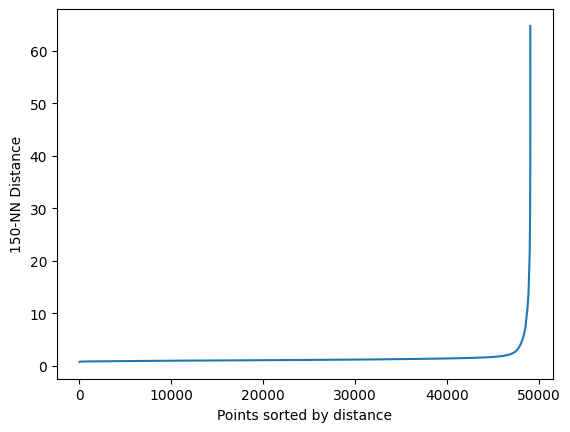

In [98]:
plot_kdist_graph(preference_st_scl.sample(frac=0.4, random_state=1), preference_metrics)

In [ ]:
from sklearn.cluster import DBSCAN  # For the DBSCAN algorithm
import numpy as np                  # For numerical operations (e.g., np.unique)
from collections import Counter 

dbscan = DBSCAN(eps=1.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_st_scl.sample(frac=0.4, random_state=1))

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_st_scl.sample(frac=0.4, random_state=1).shape[0],2))

Number of estimated clusters  : 9
Counter of cluster labels     : Counter({np.int64(2): 14693, np.int64(1): 9913, np.int64(0): 8571, np.int64(5): 6002, np.int64(-1): 5072, np.int64(4): 1786, np.int64(3): 1495, np.int64(6): 1065, np.int64(7): 482})
Percentage of noise rows      : 10.33


In [102]:
from sklearn.cluster import DBSCAN  # For the DBSCAN algorithm
import numpy as np                  # For numerical operations (e.g., np.unique)
from collections import Counter 

dbscan = DBSCAN(eps=1.2, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_st_scl.sample(frac=0.4, random_state=1))

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_st_scl.sample(frac=0.4, random_state=1).shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(2): 14860, np.int64(3): 10387, np.int64(0): 10283, np.int64(1): 10068, np.int64(-1): 3481})
Percentage of noise rows      : 7.09
